In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("mall_rental_data.csv")
dataset

,Shop_ID,Mall_Name,City,Floor,Shop_Size_sqft,Footfall_per_day,Nearby_Brands,Has_Food_Court,Monthly_Sales,Rent
0,S001,Lulu Mall,Delhi,2,352,6311,2,0,962727,67310
1,S002,Forum Mall,Chennai,4,2961,802,16,0,549722,45221
2,S003,VR Chennai,Mumbai,0,1402,1138,9,0,1783693,3704
3,S004,Forum Mall,Mumbai,4,1849,555,12,0,608924,68503
4,S005,Forum Mall,Bangalore,3,1400,9217,13,1,1834033,85666
...,...,...,...,...,...,...,...,...,...,...
195,S196,VR Chennai,Kochi,4,1430,845,3,1,1352549,44571
196,S197,VR Chennai,Kochi,4,2205,9054,10,0,1381673,65858
197,S198,Phoenix Marketcity,Chennai,4,774,2943,10,1,1475402,41831
198,S199,Forum Mall,Bangalore,4,2040,8283,9,0,1612833,49625


In [3]:
dataset.shape

(200, 10)

In [4]:
dataset.isnull().sum()

Shop_ID             0
Mall_Name           0
City                0
Floor               0
Shop_Size_sqft      0
Footfall_per_day    0
Nearby_Brands       0
Has_Food_Court      0
Monthly_Sales       0
Rent                0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Shop_ID           200 non-null    object
 1   Mall_Name         200 non-null    object
 2   City              200 non-null    object
 3   Floor             200 non-null    int64 
 4   Shop_Size_sqft    200 non-null    int64 
 5   Footfall_per_day  200 non-null    int64 
 6   Nearby_Brands     200 non-null    int64 
 7   Has_Food_Court    200 non-null    int64 
 8   Monthly_Sales     200 non-null    int64 
 9   Rent              200 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 15.8+ KB


In [6]:
dataset=dataset.drop("Shop_ID",axis=1)
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,Floor,Shop_Size_sqft,Footfall_per_day,Nearby_Brands,Has_Food_Court,Monthly_Sales,Rent,Mall_Name_Forum Mall,Mall_Name_Lulu Mall,Mall_Name_Phoenix Marketcity,Mall_Name_VR Chennai,City_Chennai,City_Delhi,City_Kochi,City_Mumbai
0,2,352,6311,2,0,962727,67310,0,1,0,0,0,1,0,0
1,4,2961,802,16,0,549722,45221,1,0,0,0,1,0,0,0
2,0,1402,1138,9,0,1783693,3704,0,0,0,1,0,0,0,1
3,4,1849,555,12,0,608924,68503,1,0,0,0,0,0,0,1
4,3,1400,9217,13,1,1834033,85666,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,1430,845,3,1,1352549,44571,0,0,0,1,0,0,1,0
196,4,2205,9054,10,0,1381673,65858,0,0,0,1,0,0,1,0
197,4,774,2943,10,1,1475402,41831,0,0,1,0,1,0,0,0
198,4,2040,8283,9,0,1612833,49625,1,0,0,0,0,0,0,0


In [7]:
dataset.columns

Index(['Floor', 'Shop_Size_sqft', 'Footfall_per_day', 'Nearby_Brands',
       'Has_Food_Court', 'Monthly_Sales', 'Rent', 'Mall_Name_Forum Mall',
       'Mall_Name_Lulu Mall', 'Mall_Name_Phoenix Marketcity',
       'Mall_Name_VR Chennai', 'City_Chennai', 'City_Delhi', 'City_Kochi',
       'City_Mumbai'],
      dtype='object')

In [8]:
indep_X=dataset.drop("Rent", axis=1)
indep_X

,Floor,Shop_Size_sqft,Footfall_per_day,Nearby_Brands,Has_Food_Court,Monthly_Sales,Mall_Name_Forum Mall,Mall_Name_Lulu Mall,Mall_Name_Phoenix Marketcity,Mall_Name_VR Chennai,City_Chennai,City_Delhi,City_Kochi,City_Mumbai
0,2,352,6311,2,0,962727,0,1,0,0,0,1,0,0
1,4,2961,802,16,0,549722,1,0,0,0,1,0,0,0
2,0,1402,1138,9,0,1783693,0,0,0,1,0,0,0,1
3,4,1849,555,12,0,608924,1,0,0,0,0,0,0,1
4,3,1400,9217,13,1,1834033,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,1430,845,3,1,1352549,0,0,0,1,0,0,1,0
196,4,2205,9054,10,0,1381673,0,0,0,1,0,0,1,0
197,4,774,2943,10,1,1475402,0,0,1,0,1,0,0,0
198,4,2040,8283,9,0,1612833,1,0,0,0,0,0,0,0


In [9]:
dep_Y=dataset["Rent"]
dep_Y

0      67310
1      45221
2       3704
3      68503
4      85666
       ...  
195    44571
196    65858
197    41831
198    49625
199    54938
Name: Rent, Length: 200, dtype: int64

## Univariate

In [10]:
for columnName in dataset.columns:
    print(columnName)

Floor
Shop_Size_sqft
Footfall_per_day
Nearby_Brands
Has_Food_Court
Monthly_Sales
Rent
Mall_Name_Forum Mall
Mall_Name_Lulu Mall
Mall_Name_Phoenix Marketcity
Mall_Name_VR Chennai
City_Chennai
City_Delhi
City_Kochi
City_Mumbai


In [11]:
from Univariate import univariate

In [12]:
qual,quan=univariate.QuanQual(dataset)

In [13]:
quan

['Floor',
 'Shop_Size_sqft',
 'Footfall_per_day',
 'Nearby_Brands',
 'Has_Food_Court',
 'Monthly_Sales',
 'Rent',
 'Mall_Name_Forum Mall',
 'Mall_Name_Lulu Mall',
 'Mall_Name_Phoenix Marketcity',
 'Mall_Name_VR Chennai',
 'City_Chennai',
 'City_Delhi',
 'City_Kochi',
 'City_Mumbai']

In [14]:
descriptive=pd.DataFrame()

In [15]:
univariate.Univariate(dataset,quan)

,Floor,Shop_Size_sqft,Footfall_per_day,Nearby_Brands,Has_Food_Court,Monthly_Sales,Rent,Mall_Name_Forum Mall,Mall_Name_Lulu Mall,Mall_Name_Phoenix Marketcity,Mall_Name_VR Chennai,City_Chennai,City_Delhi,City_Kochi,City_Mumbai
Mean,2.135,1542.19,5001.405,10.135,0.455,1010031.305,51942.225,0.18,0.245,0.215,0.185,0.195,0.19,0.17,0.225
Median,2.0,1503.0,4806.5,10.0,0.0,1025155.5,49631.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mode,4,1178,6871,18,0,57906,26389,0,0,0,0,0,0,0,0
Q1:25%,1.0,820.0,2518.75,5.75,0.0,536851.0,33991.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q2:50%,2.0,1503.0,4806.5,10.0,0.0,1025155.5,49631.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q3:75%,4.0,2255.5,7384.25,15.0,1.0,1426538.75,68451.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99%,4.0,2991.01,9861.83,19.0,1.0,1971410.59,112844.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Q4:100%,4.0,2995.0,9946.0,19.0,1.0,1996793.0,134727.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
IQR,3.0,1435.5,4865.5,9.25,1.0,889687.75,34460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.5rule,4.5,2153.25,7298.25,13.875,1.5,1334531.625,51690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
univariate.freqTable("Monthly_Sales",dataset)

,Unique_values,Frequency,Relative_Frequency,Cumsum
0,962727,1,0.009709,0.009709
1,1990873,1,0.009709,0.019417
2,1776470,1,0.009709,0.029126
3,1293268,1,0.009709,0.038835
4,98874,1,0.009709,0.048544
...,...,...,...,...
195,1192953,1,0.009709,1.902913
196,1914200,1,0.009709,1.912621
197,1931550,1,0.009709,1.922330
198,1927528,1,0.009709,1.932039


Mean=51942.225, Standard Deviation=25874.569
The area between range(25000,50000):0.32120224864743224


0.32120224864743224

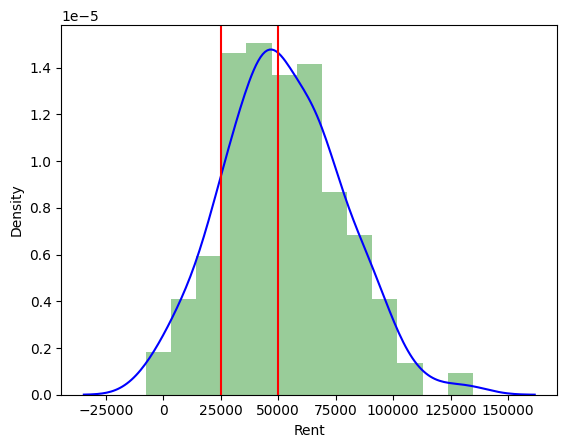

In [17]:
univariate.get_pdf_probability(dataset['Rent'],25000,50000)

## Bivariate

In [18]:
dataset.select_dtypes(include='number').cov()

,Floor,Shop_Size_sqft,Footfall_per_day,Nearby_Brands,Has_Food_Court,Monthly_Sales,Rent,Mall_Name_Forum Mall,Mall_Name_Lulu Mall,Mall_Name_Phoenix Marketcity,Mall_Name_VR Chennai,City_Chennai,City_Delhi,City_Kochi,City_Mumbai
Floor,2.187714,3.910487e+01,5.667692e+02,-0.787161,0.063894,-1.219605e+04,-9.547692e+02,0.071055,0.011985,-0.009070,-0.020075,0.058970,-0.020754,0.012111,-0.025503
Shop_Size_sqft,39.104874,7.219262e+05,-3.572773e+04,47.225477,34.189497,-7.012619e+07,9.641141e+06,-16.225327,0.078844,16.843367,-23.552915,33.244171,-6.357889,15.012764,-9.917337
Footfall_per_day,566.769171,-3.572773e+04,7.885776e+06,-397.733342,-35.778166,7.811129e+07,1.161789e+07,67.539799,-168.567060,167.208970,-94.210980,-124.983894,45.842261,89.619246,16.501382
Nearby_Brands,-0.787161,4.722548e+01,-3.977333e+02,28.137462,0.063894,1.176238e+05,1.932077e+04,0.020804,0.052186,-0.154799,-0.120578,-0.051583,-0.096131,0.298543,-0.161181
Has_Food_Court,0.063894,3.418950e+01,-3.577817e+01,0.063894,0.249221,-1.731842e+04,3.004792e+03,-0.006935,-0.011533,0.027312,-0.024296,0.001281,0.028693,-0.022462,-0.022487
Monthly_Sales,-12196.051432,-7.012619e+07,7.811129e+07,117623.752588,-17318.415854,3.180099e+11,-2.564084e+09,31210.693568,-24954.190678,16539.235603,-1214.544146,-20579.627613,7960.358844,-2592.172714,27172.433543
Rent,-954.769221,9.641141e+06,1.161789e+07,19320.768467,3004.791583,-2.564084e+09,6.694933e+08,94.823618,571.914447,82.082035,-835.217714,566.192085,27.625377,35.634925,-574.568467
Mall_Name_Forum Mall,0.071055,-1.622533e+01,6.753980e+01,0.020804,-0.006935,3.121069e+04,9.482362e+01,0.148342,-0.044322,-0.038894,-0.033467,-0.010151,0.015879,-0.005628,-0.010553
Mall_Name_Lulu Mall,0.011985,7.884422e-02,-1.685671e+02,0.052186,-0.011533,-2.495419e+04,5.719144e+02,-0.044322,0.185905,-0.052940,-0.045553,0.022337,-0.016633,-0.006683,0.004899
Mall_Name_Phoenix Marketcity,-0.009070,1.684337e+01,1.672090e+02,-0.154799,0.027312,1.653924e+04,8.208204e+01,-0.038894,-0.052940,0.169623,-0.039975,-0.011985,-0.000854,0.003467,0.016709


In [19]:
dataset.select_dtypes(include="number").corr()

,Floor,Shop_Size_sqft,Footfall_per_day,Nearby_Brands,Has_Food_Court,Monthly_Sales,Rent,Mall_Name_Forum Mall,Mall_Name_Lulu Mall,Mall_Name_Phoenix Marketcity,Mall_Name_VR Chennai,City_Chennai,City_Delhi,City_Kochi,City_Mumbai
Floor,1.000000,0.031116,0.136455,-0.100329,0.086532,-0.014622,-0.024948,0.124730,0.018793,-0.014890,-0.034867,0.100376,-0.035677,0.021743,-0.041187
Shop_Size_sqft,0.031116,1.000000,-0.014974,0.010478,0.080604,-0.146357,0.438540,-0.049581,0.000215,0.048133,-0.071211,0.098507,-0.019026,0.046920,-0.027882
Footfall_per_day,0.136455,-0.014974,1.000000,-0.026701,-0.025521,0.049325,0.159894,0.062446,-0.139221,0.144576,-0.086184,-0.112054,0.041508,0.084748,0.014037
Nearby_Brands,-0.100329,0.010478,-0.026701,1.000000,0.024128,0.039322,0.140770,0.010183,0.022817,-0.070857,-0.058395,-0.024483,-0.046080,0.149456,-0.072584
Has_Food_Court,0.086532,0.080604,-0.025521,0.024128,1.000000,-0.061517,0.232621,-0.036066,-0.053579,0.132835,-0.125025,0.006462,0.146145,-0.119484,-0.107601
Monthly_Sales,-0.014622,-0.146357,0.049325,0.039322,-0.061517,1.000000,-0.175727,0.143698,-0.102631,0.071212,-0.005533,-0.091878,0.035893,-0.012207,0.115101
Rent,-0.024948,0.438540,0.159894,0.140770,0.232621,-0.175727,1.000000,0.009515,0.051264,0.007703,-0.082923,0.055092,0.002715,0.003657,-0.053044
Mall_Name_Forum Mall,0.124730,-0.049581,0.062446,0.010183,-0.036066,0.143698,0.009515,1.000000,-0.266894,-0.245196,-0.223222,-0.066353,0.104832,-0.038804,-0.065449
Mall_Name_Lulu Mall,0.018793,0.000215,-0.139221,0.022817,-0.053579,-0.102631,0.051264,-0.266894,1.000000,-0.298122,-0.271404,0.130428,-0.098089,-0.041162,0.027144
Mall_Name_Phoenix Marketcity,-0.014890,0.048133,0.144576,-0.070857,0.132835,0.071212,0.007703,-0.245196,-0.298122,1.000000,-0.249340,-0.073264,-0.005274,0.022356,0.096909


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    return (vif)

In [21]:
calc_vif(dataset[["Floor","Shop_Size_sqft","Footfall_per_day","Nearby_Brands","Has_Food_Court","Monthly_Sales"]])

,variables,VIF
0,Floor,2.902708
1,Shop_Size_sqft,3.434641
2,Footfall_per_day,3.667118
3,Nearby_Brands,3.693007
4,Has_Food_Court,1.809598
5,Monthly_Sales,3.381661


## Model Creation

In [40]:
def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test
    
def r2_prediction(regressor,X_test,y_test):
     y_pred = regressor.predict(X_test)
     from sklearn.metrics import r2_score
     r2=r2_score(y_test,y_pred)
     return r2
 
def Linear(X_train,y_train,X_test):       
      
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()
        param_grid = {}
        grid = GridSearchCV(regressor, param_grid, scoring='r2', cv=5)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        r2 = r2_prediction(best_model, X_test, y_test)
        return  r2   
    
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import LinearSVR
        param_grid = {
            'C': [0.1, 1, 10, 50, 100],
            'epsilon': [0.0, 0.1, 0.2]
        }
        regressor = LinearSVR(random_state=0)
        grid = GridSearchCV(regressor, param_grid, scoring='r2', cv=5)
        grid.fit(X_train, y_train)
    
        best_model = grid.best_estimator_
        r2 = r2_prediction(best_model, X_test, y_test)
        return  r2  
    
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVR
        param_grid = {
            'C': [1, 10, 50, 100],
            'gamma': [0.001, 0.01, 0.05, 0.1],
            'kernel': ['rbf']
        }
        regressor = SVR()
        grid = GridSearchCV(regressor, param_grid, scoring='r2', cv=5)
        grid.fit(X_train, y_train)
    
        best_model = grid.best_estimator_
        r2 = r2_prediction(best_model, X_test, y_test)
        return  r2  
     
def Decision(X_train,y_train,X_test):
        
        
        from sklearn.tree import DecisionTreeRegressor
        param_grid = {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
        regressor = DecisionTreeRegressor(random_state=0)
        grid = GridSearchCV(regressor, param_grid, scoring='r2', cv=5)
        grid.fit(X_train, y_train)
    
        best_model = grid.best_estimator_
        r2 = r2_prediction(best_model, X_test, y_test)
        return  r2  
     

def random(X_train,y_train,X_test):       
        
        from sklearn.ensemble import RandomForestRegressor
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10]
        }
        regressor = RandomForestRegressor(random_state=0)
        grid = GridSearchCV(regressor, param_grid, scoring='r2', cv=5)
        grid.fit(X_train, y_train)
    
        best_model = grid.best_estimator_
        r2 = r2_prediction(best_model, X_test, y_test)
        return  r2 

def gradient(X_train,y_train,X_test):
    from sklearn.ensemble import GradientBoostingRegressor
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [2, 3, 4, 5]
    }
    regressor = GradientBoostingRegressor(random_state=0)
    grid = GridSearchCV(regressor, param_grid, scoring='r2', cv=5)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    r2 = r2_prediction(best_model, X_test, y_test)
    return r2
    
def rfeFeature(indep_X,dep_Y,n):
        rfelist=[]
        
        from sklearn.linear_model import LinearRegression
        lin = LinearRegression()
        
        from sklearn.svm import LinearSVR
        SVRl = LinearSVR()
        
        from sklearn.svm import SVR
        SVRnl = SVR(kernel = 'linear')
        
        from sklearn.tree import DecisionTreeRegressor
        dec = DecisionTreeRegressor(random_state = 0)
        
        from sklearn.ensemble import RandomForestRegressor
        rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

        from sklearn.ensemble import GradientBoostingRegressor
        gbr = GradientBoostingRegressor(n_estimators=100, random_state=0)
        
        rfemodellist=[lin,SVRl,SVRnl,dec,rf,gbr] 
        for i in   rfemodellist:
            print(i)
            log_rfe = RFE(estimator=i, n_features_to_select=n)
            log_fit = log_rfe.fit(indep_X, dep_Y)
            log_rfe_feature=log_fit.transform(indep_X)
            rfelist.append(log_rfe_feature)
        return rfelist
    
def rfe_regression(acclog,accsvml,accsvmnl,accdes,accrf,accgb): 
    
    rfedataframe=pd.DataFrame(index=['Linear','SVMl','SVMNl','Random','DecisionTree','Gradient'],columns=['Linear','SVMl','SVMNl',
                                                                                        'Decision','Random','Gradient'])

    for number,idex in enumerate(rfedataframe.index):
        
        rfedataframe['Linear'][idex]=acclog[number]       
        rfedataframe['SVMl'][idex]=accsvml[number]
        rfedataframe['SVMNl'][idex]=accsvml[number]
        rfedataframe['Decision'][idex]=accdes[number]
        rfedataframe['Random'][idex]=accrf[number]
        rfedataframe['Gradient'][idex]=accrf[number]
    return rfedataframe

In [48]:
rfelist=rfeFeature(indep_X,dep_Y,6)       

acclin=[]
accsvml=[]
accsvmnl=[]
accdes=[]
accrf=[]
accgb=[]

LinearRegression()
LinearSVR()
SVR(kernel='linear')
DecisionTreeRegressor(random_state=0)
RandomForestRegressor(random_state=0)
GradientBoostingRegressor(random_state=0)


In [49]:
for i in rfelist:   
    X_train, X_test, y_train, y_test=split_scalar(i,dep_Y)  
    r2_lin=Linear(X_train,y_train,X_test)
    acclin.append(r2_lin)
    
    r2_sl=svm_linear(X_train,y_train,X_test)    
    accsvml.append(r2_sl)
    
    r2_NL=svm_NL(X_train,y_train,X_test)
    accsvmnl.append(r2_NL)
    
    r2_d=Decision(X_train,y_train,X_test)
    accdes.append(r2_d)
    
    r2_r=random(X_train,y_train,X_test)
    accrf.append(r2_r)

    r2_r=gradient(X_train,y_train,X_test)
    accgb.append(r2_r)
    
    
result=rfe_regression(acclin,accsvml,accsvmnl,accdes,accrf,accgb)

In [47]:
result1 = result
result1
#5

,Linear,SVMl,SVMNl,Decision,Random,Gradient
Linear,-0.066806,-2.154315,-2.154315,-0.089325,-0.092294,-0.092294
SVMl,0.184371,-2.102256,-2.102256,-0.178617,0.100344,0.100344
SVMNl,0.141797,-2.123206,-2.123206,-0.133165,-0.002003,-0.002003
Random,0.184371,-2.102256,-2.102256,-0.178617,0.100344,0.100344
DecisionTree,0.184371,-2.102256,-2.102256,-0.178617,0.100344,0.100344
Gradient,0.184371,-2.102256,-2.102256,-0.178617,0.100344,0.100344


In [50]:
result2 = result
result2
#6

,Linear,SVMl,SVMNl,Decision,Random,Gradient
Linear,-0.098961,-2.155926,-2.155926,-0.101995,-0.191591,-0.191591
SVMl,0.117036,-2.104998,-2.104998,-0.162805,-0.010163,-0.010163
SVMNl,0.131005,-2.126987,-2.126987,-0.133165,0.013714,0.013714
Random,0.17731,-2.091874,-2.091874,-0.158276,0.086629,0.086629
DecisionTree,0.17731,-2.091874,-2.091874,-0.158276,0.086629,0.086629
Gradient,0.17731,-2.091874,-2.091874,-0.158276,0.086629,0.086629


In [44]:
result3 = result
result3
#7

,Linear,SVMl,SVMNl,Decision,Random,Gradient
Linear,-0.103413,-2.160292,-2.160292,-0.102403,-0.140979,-0.140979
SVMl,0.094143,-2.11539,-2.11539,-0.244542,0.008537,0.008537
SVMNl,0.130387,-2.088994,-2.088994,-0.110489,-0.029381,-0.029381
Random,0.171788,-2.114712,-2.114712,-0.158276,0.07904,0.07904
DecisionTree,0.170031,-2.050558,-2.050558,-0.204986,0.081744,0.081744
Gradient,0.170031,-2.050558,-2.050558,-0.204986,0.081744,0.081744


In [51]:
# --- Store all results DataFrames here ---
results = [result1, result2, result3]   # add as many as we have

summary = []

for i, df in enumerate(results, start=5):   # since numbering starts at #5
    best_model = df.max().idxmax()          # best column name (model)
    best_score = df.max().max()             # best R² or accuracy
    summary.append({
        "Result_No": f"# {i}",
        "Best_Model": best_model,
        "Best_Score": best_score
    })

summary_df = pd.DataFrame(summary)
print(summary_df)

  Result_No Best_Model  Best_Score
0       # 5     Linear    0.184371
1       # 6     Linear    0.177310
2       # 7     Linear    0.171788
